In [54]:
import os, time
from scipy import stats
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [55]:
# Create timestamp to show when this summary was run
print 'Summary run: ' + time.strftime("%a, %d %b %Y %H:%M")

Summary run: Fri, 03 Apr 2020 16:17


In [56]:
relative_path = '../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### By Facility Type

In [57]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [58]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"468,008,082","391,482,745","-76,525,337",-16.35%
HOV,"1,194,523","1,077,197","-117,326",-9.82%
Principal Arterial,"11,044,380","11,638,284","593,904",5.38%
Ramp,"352,596","268,200","-84,396",-23.94%
Total,"480,599,581","404,466,426","-76,133,155",-15.84%


----
### By County

In [59]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"338,145,881","297,824,128","-40,321,753",-11.92%
Pierce,"76,929,900","55,602,552","-21,327,348",-27.72%
Snohomish,"65,523,800","51,039,746","-14,484,054",-22.11%
Total,"480,599,581","404,466,426","-76,133,155",-15.84%


----
### Scatterplots 

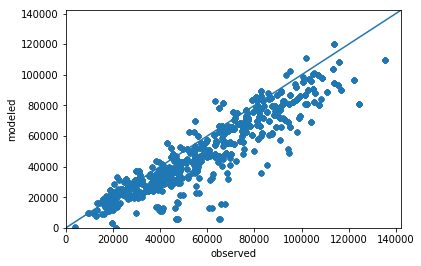

In [60]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [61]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2: ' + str(r_value)

r^2: 0.915431083889


---
By County

King r^2: 0.950979009032
Pierce r^2: 0.612996539894
Snohomish r^2: 0.904099730239


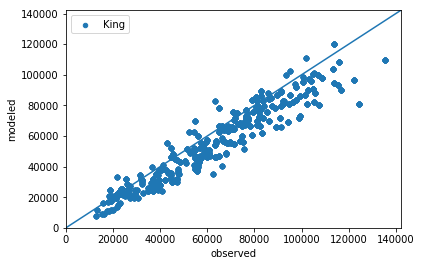

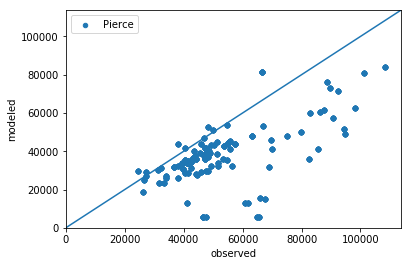

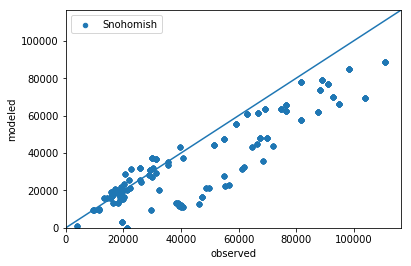

In [62]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print str(county) + ' r^2: ' + str(r_value)

---
By Facility Type

r^2 Freeway: 0.903101215053
r^2 Principal Arterial: 0.900676971167


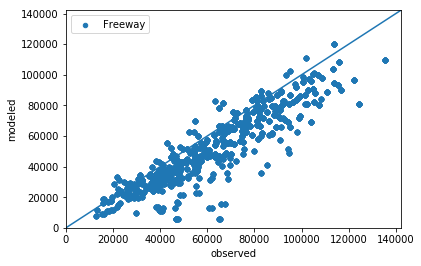

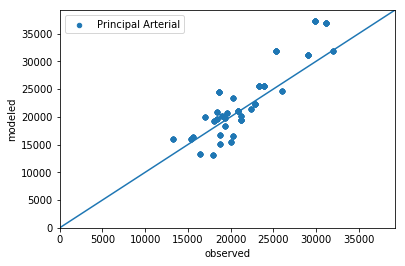

In [63]:
for factype in ['Freeway','Principal Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print 'r^2 ' + str(factype) + ': ' + str(r_value)

# Screenlines

In [64]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","462,731","-105,686",-18.59%
1,KENT,"550,322","440,082","-110,240",-20.03%
2,SEATTLE - SOUTH OF CBD,"526,500","445,881","-80,619",-15.31%
3,SHIP CANAL,"519,802","483,372","-36,430",-7.01%
4,KIRKLAND-REDMOND,"414,120","359,643","-54,477",-13.15%
5,MILL CREEK,"400,848","339,173","-61,675",-15.39%
6,SOUTH BELLEVUE,"399,500","325,229","-74,271",-18.59%
7,SEATTLE - NORTH,"372,000","329,470","-42,530",-11.43%
8,TACOMA - EAST OF CBD,"312,164","262,876","-49,288",-15.79%
9,PARKLAND,"304,322","257,528","-46,794",-15.38%


r^2 : 0.991826591616


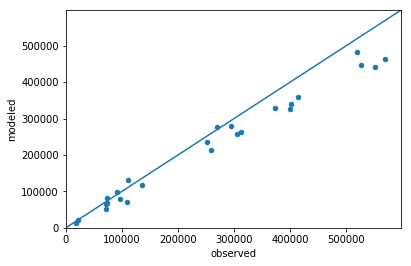

In [65]:
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2 : ' + str(r_value)

# Transit Boarding
----
### By Agency

In [66]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')
df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.sort_values('observed_5to20', ascending=False)

,agency,observed_5to20,modeled_5to20,diff,perc_diff
2,King County Metro,"392,694","702,911","310,217",79.00%
5,Sound Transit,"145,426","181,873","36,448",25.06%
0,Community Transit,"30,918","74,467","43,549",140.85%
4,Pierce Transit,"27,233","81,659","54,426",199.85%
6,Washington Ferries,"16,912","9,818","-7,094",-41.95%
3,Kitsap Transit,"7,638","21,731","14,093",184.51%
1,Everett Transit,"3,290","5,145","1,854",56.35%


----
### Key Routes
#### Ferries

In [67]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,POF West Seattle - S,"1,356","1,838",483,35.60%
1,POF Vashon Island -,670,30,-639,-95.46%
2,WSF Kingston - Edmon,"1,732",748,-985,-56.84%
3,WSF Bainbridge Islan,"8,857","6,393","-2,464",-27.82%
4,WSF Bremerton - Seat,"4,484","1,937","-2,548",-56.81%
5,WSF Fauntleroy - Sou,365,42,-323,-88.55%
6,WSF Vashon Island -,946,536,-410,-43.36%
7,WSF Southworth - Vas,239,113,-125,-52.54%
8,WSF Point Defiance -,289,50,-238,-82.57%


r^2 : 0.962296686683


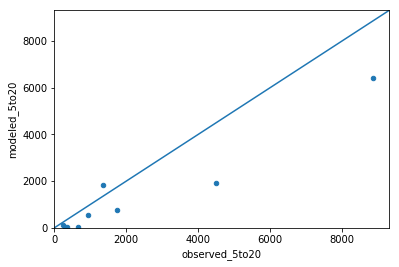

In [68]:
ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
print 'r^2 ' + str('') + ': ' + str(r_value)

#### Rail

In [69]:
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,Link Red Line,"69,383","63,810","-5,573",-8.03%
1,Sounder South,"15,356","10,112","-5,244",-34.15%
2,Sounder North,"1,667","1,486",-181,-10.87%


r^2 : 0.997935319217


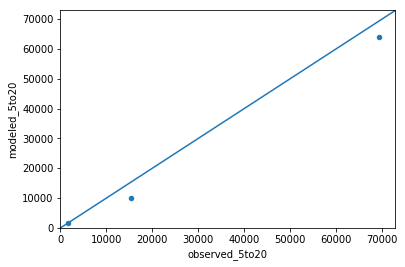

In [70]:
ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
print 'r^2 ' + str('') + ': ' + str(r_value)

#### RapidRide, Busiest Buses, Streetcar

In [71]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('modeled_5to20', ascending=False)

,description,observed_5to20,modeled_5to20,diff,perc_diff
6,E Line RapidRide,"15,336","28,347","13,011",84.84%
1,KC Metro 40,"11,405","21,440","10,035",87.99%
5,D Line RapidRide,"13,078","20,793","7,715",58.99%
4,C Line RapidRide,"11,368","19,275","7,907",69.55%
10,Sound Transit 550,"9,168","17,599","8,432",91.97%
0,KC Metro 7,"10,150","15,793","5,643",55.59%
2,A Line RapidRide,"8,522","12,526","4,004",46.98%
3,B Line RapidRide,"5,914","10,547","4,633",78.34%
7,F Line RapidRide,"5,267","10,321","5,054",95.95%
9,First Hill Streetcar,"3,586","1,810","-1,776",-49.53%


r^2 : 0.974391368613


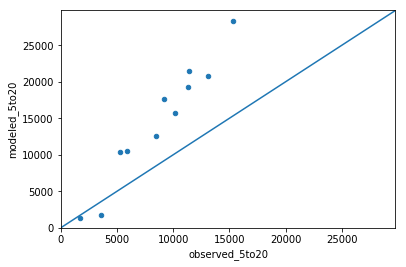

In [72]:
ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
print 'r^2 ' + str('') + ': ' + str(r_value)

---
### Lines by Agency

r^2 Community Transit: 0.873626321006
r^2 Everett Transit: -0.341938892672
r^2 King County Metro: 0.957615452332
r^2 Kitsap Transit: 0.731778362348
r^2 Pierce Transit: 0.948581813581
r^2 Sound Transit: 0.971198685606
r^2 Washington Ferries: 0.980839009398


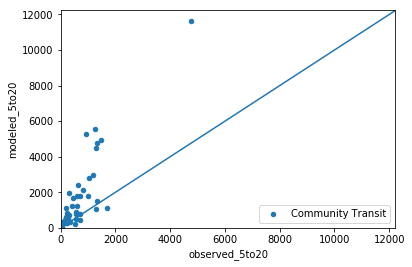

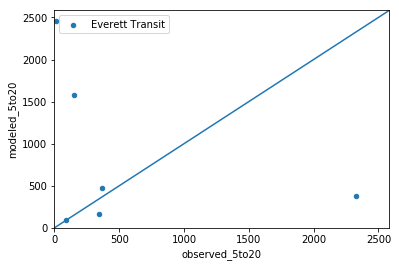

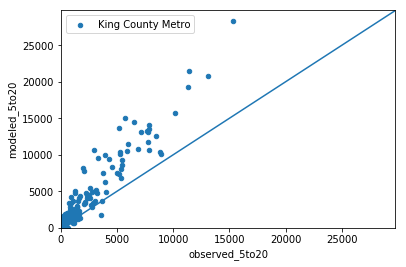

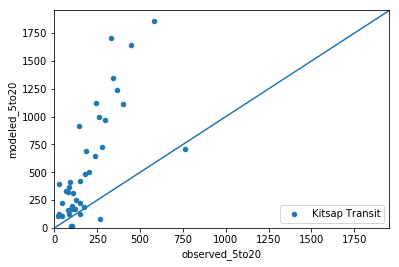

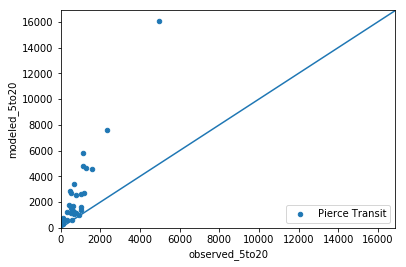

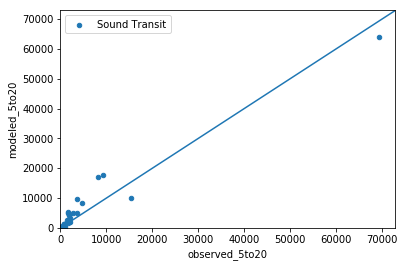

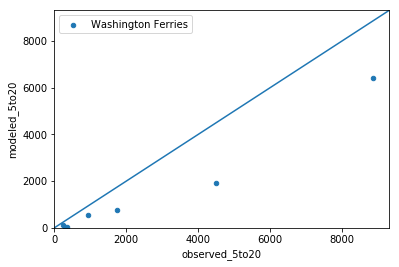

In [73]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20', label=agency)
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print 'r^2 ' + str(agency) + ': ' + str(r_value)

# Light Rail Station Boardings
----
Red Line

In [74]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_5to20']-df['observed_5to20']
df['percent_diff'] = df['diff']/df['observed_5to20']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_5to20,modeled_5to20,diff,percent_diff
station_name,,,,
Husky Stadium,"9,416","11,173","1,758",18.67%
Westlake,"10,904","7,620","-3,284",-30.12%
University St,"5,257","5,258",1,0.01%
Pioneer Square,"3,865","3,624",-241,-6.24%
Int'l District,"5,647","3,569","-2,078",-36.80%
Capitol Hill,"7,016","7,619",603,8.59%
Stadium,"1,912",600,"-1,312",-68.62%
SODO,"2,108","3,651","1,543",73.22%
Beacon Hill,"2,587","1,739",-848,-32.77%


Sound Transit Station Groupings

In [75]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_5to20','modeled_5to20']]
df_combined['diff'] = df_combined['modeled_5to20']-df_combined['observed_5to20']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_5to20']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_5to20,modeled_5to20,diff,percent_diff
station_group,,,,
Husky Stadium,"9,416","11,173","1,758",18.67%
Capitol Hill,"7,016","7,619",603,8.59%
Westlake/University St,"16,161","12,878","-3,283",-20.31%
Pioneer Square/Int'l District,"9,512","7,193","-2,319",-24.38%
Stadium/SODO,"4,020","4,251",231,5.74%
Beacon Hill/Mount Baker,"4,809","3,793","-1,016",-21.13%
Columbia City,"2,376","1,763",-613,-25.79%
Othello/Rainier Beach,"4,412","4,489",77,1.75%
Tukwila Int'l Blvd,"2,779","2,628",-151,-5.44%


# Stop Transfers

### Light Rail

In [76]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.11,-99.00,99.11,-100.12%
Westlake,0.51,0.36,0.15,41.13%
University St,0.64,0.20,0.44,221.67%
Pioneer Square,0.58,0.16,0.42,265.96%
Int'l District,0.79,0.45,0.34,74.89%
Capitol Hill,0.07,-99.00,99.07,-100.07%
Stadium,0.43,0.12,0.31,258.80%
SODO,0.55,0.31,0.24,75.26%
Beacon Hill,0.35,0.35,-0.01,-1.88%


# Externals

In [77]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,observed,modeled,diff,percent_diff
location,,,,,
I-5 to Olympia,3733,"130,000","11,433","-118,567",-91.21%
I-5 to Mount Vernon,3744,"67,000","6,621","-60,379",-90.12%
I-90 @ Snoqualmie Pass,3739,"33,000","5,048","-27,952",-84.70%
SR-532 to Camano Island,3746,"23,000",107,"-22,893",-99.54%
SR-507 to Yelm,3734,"23,000",419,"-22,581",-98.18%
SR-3 to Belfair,3749,"18,000",9,"-17,991",-99.95%
Hood Canal Bridge,3748,"18,000",909,"-17,091",-94.95%
SR-530 N/O Stanwood,3745,"9,100",0,"-9,100",-100.00%
Mukilteo-Clinton Ferry,3747,"6,300",101,"-6,199",-98.39%


# Corridor Speed

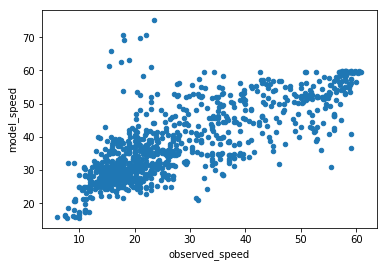

In [78]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df.plot(kind='scatter', y='model_speed', x='observed_speed')

### AM Peak, Primary Corridors

In [79]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
7,Seattle to Everett - NB,55,58
16,Everett to Seattle - SB,35,28
25,Tacoma to Seattle - NB,35,26
34,Seattle to Tacoma - SB,55,59
43,Bellevue to Lynnwood - NB,54,56
52,Lynnwood to Bellevue - SB,32,24
61,Tukwila to Bellevue - NB,32,19
70,Bellevue to Tukwila - SB,40,44
79,Auburn to Renton - NB,37,24
88,Renton to Auburn - SB,56,55


### PM Peak, Primary Corridors

In [80]:

df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
2,Seattle to Everett - NB,36,24
11,Everett to Seattle - SB,49,28
20,Tacoma to Seattle - NB,54,42
29,Seattle to Tacoma - SB,39,27
38,Bellevue to Lynnwood - NB,35,24
47,Lynnwood to Bellevue - SB,48,41
56,Tukwila to Bellevue - NB,38,32
65,Bellevue to Tukwila - SB,32,20
74,Auburn to Renton - NB,55,44
83,Renton to Auburn - SB,38,32
